In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from io import StringIO
import io
from collections import namedtuple
from datetime import datetime,timedelta
import sys
import json
import ast
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import seaborn as sns
import numpy as np
from scipy import interpolate
from scipy.interpolate import interp1d
from scipy.interpolate import interpolate
import functools

6 6


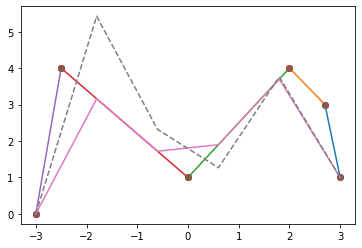

In [2]:
#,  (-2.5, -4), (0, -1), (2.5, -4), (3, -1),
plist = [(3 , 1),
         (2.7,3),
         (2, 4), 
         (0, 1),
         (-2.5, 4),
         (-3, 0)]

mylist=iter(plist)

list_x=[]
list_y=[]
first_time=True
while True:
    try:
        
        if first_time:
            x1,y1=next(mylist)
            x2,y2=next(mylist)
            plt.scatter([x1,x2],[y1,y2])
            x=np.linspace(x1, x2, num=11, endpoint=True)
            y=np.linspace(y1, y2, num=11, endpoint=True)
            first_time=False
            prev_x=x2
            prev_y=y2
            list_x.append(x)
            list_y.append(y)
        else:
            x1,y1=next(mylist)
            x=np.linspace(prev_x,x1, num=11, endpoint=True)
            y=np.linspace(prev_y, y1, num=11, endpoint=True)
            prev_x=x1
            prev_y=y1
            plt.scatter([prev_x,x1],[prev_y,y1])
            list_x.append(x)
            list_y.append(y)

        plt.plot(x, y)
        
    except StopIteration:
        break
        
list_x=[]
list_y=[]
for x,y in plist:
    list_x.append(x)
    list_y.append(y)
    

x=np.array(list_x)
y=np.array(list_y)
print(len(x),len(y))
f = interp1d(x,y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(min(x), max(x), num=len(x), endpoint=True)
plt.plot(x, y, 'o',xnew, f(xnew), xnew, f2(xnew), '--')

plt.show()

In [3]:
lst = [['05-05-2015', -40], ['05-05-2015', 30], ['07-05-2015', -75], ['05-05-2015', -40], ['05-05-2015', 120], ['07-05-2015', -150]]

df=pd.DataFrame(columns=['Date','Amount'])
for item in lst:
    print(item)
    df=df.append({'Date':item[0],'Amount':item[1]},ignore_index=True)
    
df.set_index('Date',inplace=True)
grouped=df.groupby(df.index)['Amount'].sum()

res=[[item[0],item[1]] for item in grouped.items()]

print(res)    

['05-05-2015', -40]
['05-05-2015', 30]
['07-05-2015', -75]
['05-05-2015', -40]
['05-05-2015', 120]
['07-05-2015', -150]
[['05-05-2015', 70], ['07-05-2015', -225]]


In [4]:
data=[{'value': ['raj', 'kumar']},
{'value':  ['kill', 'bill']}]
df=pd.DataFrame(data)
print(df)
def concatWords(lst):
    return functools.reduce(lambda x,y: x+" "+y,lst)
df["value"]=df["value"].apply(concatWords)
print(df)

          value
0  [raj, kumar]
1  [kill, bill]
       value
0  raj kumar
1  kill bill


In [5]:
data = {'Name': [27, 27, 30, 30, 43, 43, 50, 62, 62],
        'Time': [10, 30, 23.4, 28.6, 10, 15, 20, 25, 50]}

keys=set(data['Name'])
lst=list(zip(data['Name'],data['Time']))
print(lst)

results={}
for key in keys:
    value=functools.reduce(lambda x,y: y-x ,[x[1] for x in lst if x[0]==key])
    results[key]=value
    
print(results)

[(27, 10), (27, 30), (30, 23.4), (30, 28.6), (43, 10), (43, 15), (50, 20), (62, 25), (62, 50)]
{43: 5, 50: 20, 30: 5.200000000000003, 27: 20, 62: 25}


C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_159 (Dense)           (None, 25)                650       
                                                                 
 dense_160 (Dense)           (None, 128)               3328      
                                                                 
 dense_161 (Dense)           (None, 128)               16512     
                                                                 
 dense_162 (Dense)           (None, 128)               16512     
                                                                 
 dense_163 (Dense)           (None, 1)                 129       
                                                                 
Total params: 37,131
Trainable params: 37,131
Non-trainable params: 0
_________________________________________________________________
631/631 [==============================] - 1s 1ms

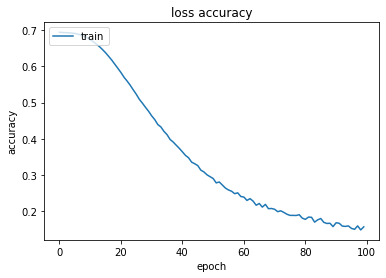

In [107]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

batch_size=67300
data = np.random.rand(batch_size, 25)
#for item in data:
#    print(item)
label = np.random.randint(0,2,(batch_size,1))
#print(data)
df=pd.DataFrame(data)
df2=pd.DataFrame(label,columns=["Target"])
df=pd.concat([df,df2],axis=1)
#print(df)

columns=[x for x in df.columns if x!="Target"]
X=df[columns]
y=df["Target"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

model= Sequential()

model.add(Dense(25, input_shape=(len(columns),),activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#model.compile(optimizer=Adam(0.01),loss='binary_crossentropy')
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

input_shape=(len(columns),)
model.build(input_shape)
model.summary()

history=model.fit(X_train, y_train,epochs = 100,verbose=0)

model.evaluate(X_test, y_test)

plt.plot(history.history['loss'])
plt.title('loss accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [101]:
print(model.metrics_names)



['loss', 'accuracy']


In [23]:
data="""index,suf,ms
11,blood,delirium
15,blood,delirium
0,blood,lucid
1,blood,lucid
5,blood,lucid
6,blood,lucid
10,blood,lucid
16,blood,lucid
3,psych,delirium
19,psych,delirium
4,psych,lucid
8,psych,lucid
9,psych,lucid
13,psych,lucid
14,psych,lucid
18,psych,lucid
7,stool,delirium
2,stool,lucid
12,stool,lucid
17,stool,lucid"""

df = pd.read_csv(io.StringIO(data), sep=',')
#print(df)
lst=[]
grouped=df.groupby(['suf','ms'])
for group in grouped.groups:
    lst.append(group)
    
print(lst)

[('blood', 'delirium'), ('blood', 'lucid'), ('psych', 'delirium'), ('psych', 'lucid'), ('stool', 'delirium'), ('stool', 'lucid')]


C:\Users\DNISHI~1\AppData\Local\Temp/ipykernel_10420/3722167638.py:37: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


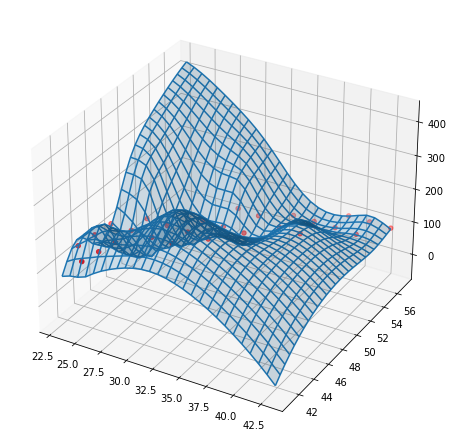

RMSE: 4.7291969753780645
R-squared 0.8206359043791779


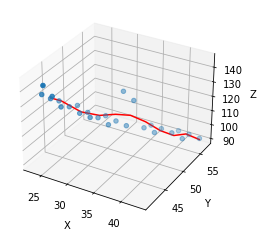

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import scipy as sp
import scipy.interpolate
from mpl_toolkits.mplot3d import Axes3D

data = np.array([[ 41. ,  57. ,  92. ],[ 39. ,  57.  , 92.4],[ 43. ,  57.  , 91.2], [ 23.,   47. , 119.6],
                 [ 27. ,  47. , 115.2], [ 25. ,  45. , 122. ], [ 25. ,  49. , 114. ],[ 29.,   49. , 109.6],
                 [ 29. ,  47. , 114.4], [ 27. ,  49. , 111.2], [ 23. ,  45. , 125.6], [ 31.,   49.,  106.8],
                 [ 25. ,  47. , 117.6], [ 39. ,  55. ,  95.6],[ 37.  , 53.  , 98.4], [ 35. ,  55. ,  96.8],
                 [ 33. ,  53. , 116.8], [ 23. ,  43. , 132.8], [ 25. ,  41. , 145.2],[ 25. ,  43.,  133.6],
                 [ 29. ,  51. , 106.4],[ 31.  , 53. , 121.2],[ 31., 51. , 104.8],[ 41.,   55.,   93.6],
                 [ 33. ,  51. , 103.6],[ 35.  , 53. ,  99.6],[ 37. ,  55. ,  96.4]])

x = data[:,0]
y = data[:,1]
z = data[:,2]

# sort data to avoid plotting problems
x, y, z = zip(*sorted(zip(x, y, z)))

x = np.array(x)
y = np.array(y)
z = np.array(z)

#Radial basis function is an advanced method in approximation theory for constructing high-order accurate 
#interpolants of unstructured data, possibly in high-dimensional spaces
spline = sp.interpolate.Rbf(x,y,z,function='thin_plate',smooth=5, episilon=5)

x_grid = np.linspace(min(x),max(x), len(x))
y_grid = np.linspace(min(y),max(y), len(y))
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')

Z = spline(B1,B2)
fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.2)
ax.scatter3D(x,y,z, c='r')
plt.show()

def polynomial_regression3d(x, y, z, degree):
    # sort data to avoid plotting problems
    x, y, z = zip(*sorted(zip(x, y, z)))

    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    
    data_yz = np.array([y,z])
    data_yz = data_yz.transpose()

    polynomial_features= PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x[:, np.newaxis])

    model = LinearRegression()
    model.fit(x_poly, data_yz)
    y_poly_pred = model.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(data_yz,y_poly_pred))
    r2 = r2_score(data_yz,y_poly_pred)
    print("RMSE:", rmse)
    print("R-squared", r2)
    
    # plot
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter(x, data_yz[:,0], data_yz[:,1])
    ax.plot(x, y_poly_pred[:,0], y_poly_pred[:,1], color='r')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()
    fig.set_dpi(150)
    
polynomial_regression3d(x,y,z,6)

    SubjectID  Feat_1  Feat_2  Feat_X  Label
0           0      89      31      43      0
1           0      94      32      68      0
2           0      38      90      86      0
3           0      79      34      78      1
4           0      85      24      70      1
5           1       7       9      32      0
6           1      60      56      72      0
7           1      68      72      23      0
8           2      26      88       1      0
9           3      45      27      22      0
10          3      10      80      67      0
11          3      71      48      21      0
12          3      58       9      60      1


C:\Users\DNISHI~1\AppData\Local\Temp/ipykernel_10420/1255113796.py:48: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  filter=df['SubjectID']==subjectID


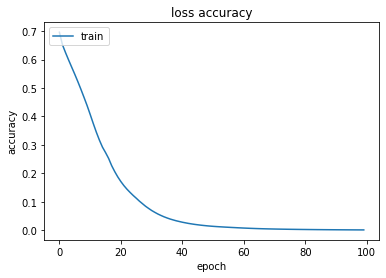

1/1 [==============================] - 1s 900ms/step - loss: 0.0010 - accuracy: 1.0000
[0.0010066370014101267, 1.0]


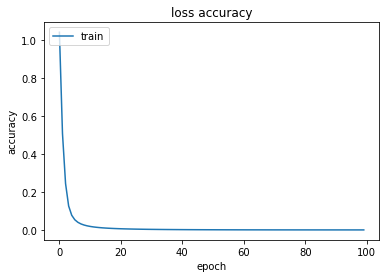

1/1 [==============================] - 0s 20ms/step - loss: 8.1151e-05 - accuracy: 1.0000
[8.11508361948654e-05, 1.0]


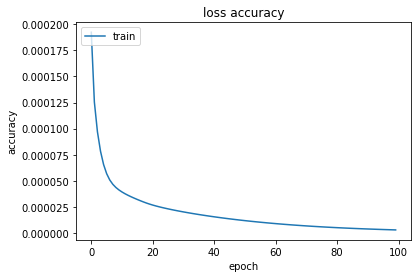

1/1 [==============================] - 0s 18ms/step - loss: 3.0092e-06 - accuracy: 1.0000
[3.009211468452122e-06, 1.0]


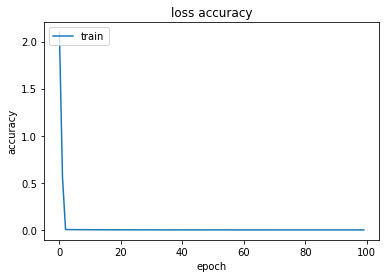

1/1 [==============================] - 0s 19ms/step - loss: 2.9124e-05 - accuracy: 1.0000
[2.9124203138053417e-05, 1.0]


In [6]:
import pandas as pd
from io import StringIO
import io
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from sklearn.preprocessing import LabelEncoder

data="""SubjectID,Feat_1,Feat_2,Feat_X,Hr_count,Label
s0001,89,31,43,1,0
s0001,94,32,68,2,0
s0001,38,90,86,3,0
s0001,79,34,78,4,1
s0001,85,24,70,5,1
s0002,7 ,9 ,32,1,0
s0002,60,56,72,2,0
s0002,68,72,23,3,0
s0003,26,88,1 ,1,0
s0004,45,27,22,1,0
s0004,10,80,67,2,0
s0004,71,48,21,3,0
s0004,58,9 ,60,4,1
"""

df=pd.read_csv(io.StringIO(data),sep=",")
df.drop(columns='Hr_count',inplace=True)
encoder=LabelEncoder()
df['SubjectID']=encoder.fit_transform(df['SubjectID'])

print(df)

X_columns=[x for x in df.columns if x!='Label']
features=len(X_columns)
model = Sequential()
model.add(LSTM(100, activation='tanh', return_sequences=True, input_shape=(1, features)))
model.add(LSTM(49, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])


grouped=df.groupby('SubjectID')



for group in grouped:
    df_batch=pd.DataFrame(columns=['SubjectID','Feat_1','Feat_2','Feat_X','Hr_count','Label'])
    for subjectID in group:
        filter=df['SubjectID']==subjectID 
        for key,item in df[filter].dropna().iterrows():
            df_batch=df_batch.append({'SubjectID':item['SubjectID'],'Feat_1':item['Feat_1'],'Feat_2':item['Feat_2'],'Feat_X':item['Feat_X'],'Label':item['Label']},ignore_index=True)
    #print("\n",df_batch)
    X=df_batch[X_columns]
    X = np.resize(X,(X.shape[0],1,X.shape[1]))
    y=df_batch['Label']
    #print("\n",X)
    history=model.fit(X,y,batch_size=len(X), 
          epochs=100,verbose=0)
    plt.plot(history.history['loss'])
    plt.title('loss accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    print(model.evaluate(X, y))